In [1]:
# 10/28/2021-1
# https://www.tensorflow.org/tutorials/load_data/images
from __future__ import absolute_import
from IPython.display import clear_output, display
import glob, os, shutil, sys, uuid
from os.path import *
from time import sleep
# from CV2_Utils import *

try: 
    from matplotlib import pyplot as plt
except Exception as err:
        %pip install matplotlib
        from matplotlib import pyplot as plt

try:
    pass
    import tensorflow as tf
except Exception as err:
    pass
    # print(err)
    %pip install tensorflow
    
import numpy as np

contentPath = os.getcwd()
tfImagesPath = join(contentPath, 'TensorflowImages')

import TarfileFunctions
from TarfileFunctions import *
from BashColors import C

if not exists(tfImagesPath):
    os.makedirs(tfImagesPath)
    os.chdir(tfImagesPath)
    tff.extractTarfiles('New_Juno_Original_Images.tar.gz')

os.chdir(contentPath)
from TarfileFunctions import *
from BashColors import C
tarfilePath=join(contentPath, 'New_Juno_Original_Images.tar.gz')
if exists(tarfilePath) and not exists(tfImagesPath):
    tff.extractTarfiles('New_Juno_Original_Images.tar.gz')

tfImagesPath = join(contentPath, 'TensorflowImages')

os.chdir(contentPath)
cv2Path = join(contentPath, 'CV2Images')

if not exists(cv2Path):
    os.mkdir(cv2Path)
    tff.extractTarfiles('All_CV2_Images.tar.gz')

os.chdir(contentPath)

print(f'tf version: {C.IBlue}{tf.__version__}{C.ColorOff}')
print(f'cwd: {C.IBlue}{os.getcwd()}{C.ColorOff}')


2021-10-28 17:26:14.367235: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-28 17:26:14.367321: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


tf version: 2.6.0
cwd: /home/jovyan


In [2]:
import tensorflow as tf

In [3]:
# image_dataset_from_directory function
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [4]:
from tensorflow.keras.utils import image_dataset_from_directory
if exists(cv2Path):
    print(cv2Path)
train_ds = image_dataset_from_directory(
    cv2Path,
    validation_split=0.2,
    subset="training",
    seed=456,
    image_size=(224, 224),
    batch_size=32)
print()
val_ds = image_dataset_from_directory(
    cv2Path,
    validation_split=0.2,
    subset="validation",
    seed=456,
    image_size=(224, 224),
    batch_size=32)

/home/jovyan/CV2Images
Found 216 files belonging to 2 classes.
Using 173 files for training.


2021-10-28 17:26:18.476732: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-28 17:26:18.476866: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-28 17:26:18.476905: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-iypc-2dteam-2dcurrentproject-2daoafnn8k): /proc/driver/nvidia/version does not exist
2021-10-28 17:26:18.479406: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



Found 216 files belonging to 2 classes.
Using 43 files for validation.


In [5]:
class_names = train_ds.class_names
# print(class_names)

2021-10-28 17:26:18.777231: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


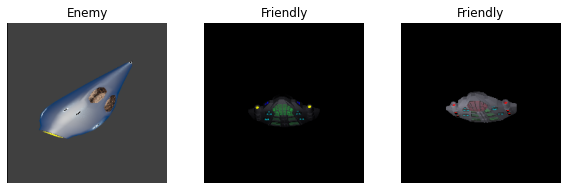

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [7]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [8]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [9]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image),'-', np.max(first_image))

0.0 - 1.0


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
num_classes = 2

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)])

In [12]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [13]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=2)

Epoch 1/2


2021-10-28 17:26:22.040018: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 201867264 exceeds 10% of free system memory.
2021-10-28 17:26:25.040843: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 100933632 exceeds 10% of free system memory.
2021-10-28 17:26:25.040983: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 201867264 exceeds 10% of free system memory.


1/6 [====>.........................] - ETA: 26s - loss: 0.6995 - accuracy: 0.3125

2021-10-28 17:26:26.266220: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 201867264 exceeds 10% of free system memory.
2021-10-28 17:26:29.181441: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 100933632 exceeds 10% of free system memory.


6/6 [==============================] - 25s 4s/step - loss: 0.2260 - accuracy: 0.8555 - val_loss: 1.7609e-04 - val_accuracy: 1.0000
Epoch 2/2
6/6 [==============================] - 23s 4s/step - loss: 2.0814e-05 - accuracy: 1.0000 - val_loss: 2.7723e-09 - val_accuracy: 1.0000


In [14]:
history = tf.keras.callbacks.History
# help(history)

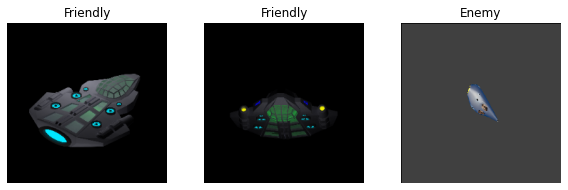

In [15]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(3):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [16]:
model_path=join(contentPath, 'first_model.h5')
model.save(model_path)
model.save_weights(model_path)

In [17]:
print(model.count_params())
print(model.input_shape)
print(model.run_eagerly)

2788674
(None, 224, 224, 3)
False


In [18]:
path=join(contentPath, 'enemy.png')
array=np.copy(path)

# Load the model
model = tf.keras.models.load_model(model_path,
                                   custom_objects=None,
                                   compile=True,
                                   options=None)

# A few random samples
use_samples = [5, 38, 3939, 27389]
samples_to_predict = []

# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)

# Generate predictions for samples
predictions = model.predict(samples_to_predict)
print(predictions)

ValueError: No model found in config file.